Let's first import all the necessary functions and classes

In [1]:
from NanoParticleTools.inputs.spectral_kinetics import SpectralKinetics
from NanoParticleTools.species_data import Dopant

from NanoParticleTools.analysis import get_wavelengths, mean_population_to_intensities
from NanoParticleTools.analysis.util import get_spectrum_wavelength_from_intensities
from NanoParticleTools.util.conversions import wavenumber_to_wavelength

from matplotlib import pyplot as plt
import numpy as np

Now let's set up the conditions for the simulation

In [2]:
# We'll be simulating a nanoparticle with Yb and Tm dopants.
dopants = [
    Dopant('Yb', 0.93),
    Dopant('Tm', 0.07)
]

excitation_power = 1e5  # W/cm^2
excitation_wavelength = 980  # nm

Create the spectral kinetics class. The `SpectralKinetics` module is responsible for enumerating
and calculating the rates for each transition.

In [3]:
sk = SpectralKinetics(dopants,
                      excitation_wavelength=excitation_wavelength,
                      excitation_power=excitation_power)

Integrate the rate equations from t = 0 ms to t = 10 ms

In [4]:
solution = sk.run_kinetics(t_span=(0, 0.01))

Plot the population evolution

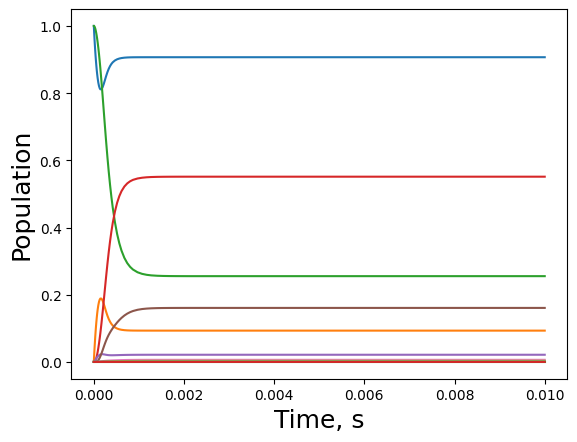

In [5]:
plt.plot(*solution)
plt.xlabel('Time, s', fontsize=18)
plt.ylabel('Population', fontsize=18)
plt.show()

Plot the spectra that results from the steady state population. 

Note: Negative wavelength corresponds to emissions and positive to absorption

/Users/sivonxay/opt/anaconda3/envs/npmc_env/code/NanoParticleTools/src/NanoParticleTools/util/conversions.py:11: RuntimeWarning: divide by zero encountered in divide
  return 1 / wavenumber * 1e7


Text(0, 0.5, 'Intensity, cps (per volume)')

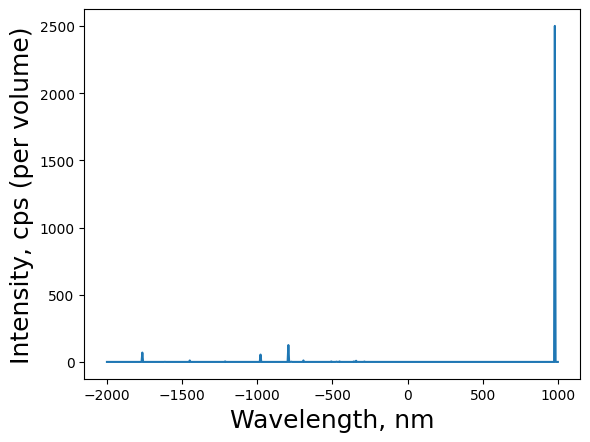

In [6]:
x_range = -2000, 1000
x_step = 5
volume = 1

final_population = solution[1][-1]

intensities = mean_population_to_intensities(sk, final_population, volume)
wavelengths = get_wavelengths(sk)
x, y = get_spectrum_wavelength_from_intensities(wavelengths, intensities)

plt.plot(x, y)
plt.xlabel('Wavelength, nm', fontsize=18)
plt.ylabel('Intensity, cps (per volume)', fontsize=18)

Now we switch off the excitation and look at the decay of the states.

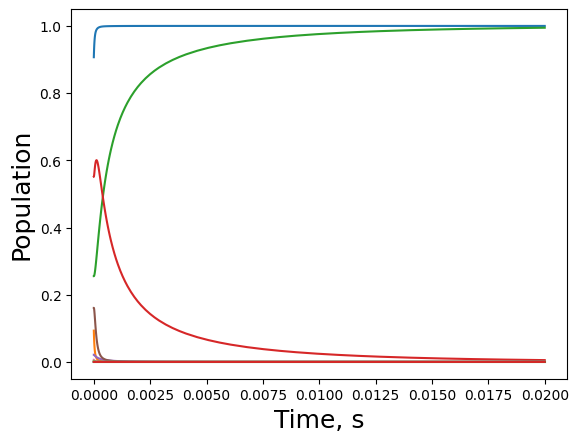

In [7]:
decay_sk = SpectralKinetics(dopants,
                            excitation_wavelength=excitation_wavelength,
                            excitation_power=0)
decay_solution = decay_sk.run_kinetics(solution[1][-1], t_span=(0, 0.02))
plt.plot(*decay_solution)
plt.xlabel('Time, s', fontsize=18)
plt.ylabel('Population', fontsize=18)
plt.show()